# 2D Poiseuille with Immersed Boundary

This notebook primarily serves as checking points along the development for 2D Poiseuille flow with IB-LBM.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

print(os.getcwd())
%pwd
# %cd ..
print(os.getcwd())

/Users/tweng/Desktop/IB-LBM
/Users/tweng/Desktop/IB-LBM


### Do a test run with the python-bash interface

To ensure the interface is working correctly

In [14]:
# Test Folder Entry
DIR = '2dpois_test'
SUBSET = 'set1'
if not os.path.exists(os.path.join(os.getcwd(), 'temp/', SUBSET)):
    os.mkdir(os.path.join(os.getcwd(), 'temp/', SUBSET))

Re = 1/100
N = 19

# System Geometry
Nx = N 
Ny = N + 1
Nz = 1

# Simulation timescale
t_num = 2000
t_disk = 100
t_lbm = 1

# Controlled parameters
vel_back =  3 * Re / ((t_lbm - 0.5) * N)
# print(vel_back)
Gamma = 100
L = 3e-6
U = 0.7
A = 1e-3 / np.square(N/60)
zeta = (0.073)/ np.square(N/60)
xi = 1

Parameters = str(Nx)+' '+str(Ny)+' '+str(Nz)+' '+str(t_num)+' '+str(t_disk)+' '+str(t_lbm)+' '+str(vel_back)+' '+str(Gamma)+' '+str(L)+' '+str(U)+' '+str(A)+' '+str(zeta)+' '+str(xi)

FileName = "SimulationParameters.txt"
FileID = os.path.join(os.getcwd(), 'temp/', SUBSET, FileName)
    
with open(FileID, "w") as f:
    f.write("Nx Ny Nz TOTAL_TIME DISK_TIME LBM_TIME LID_SPEED GAMMA FRANK_CONSTANT NEMATIC_STRENGTH NEMATIC_DENSITY ZETA FLOW_ALIGNING\n")
    f.write(Parameters)

Process = subprocess.Popen(
    [       
        'bash',
        'bash/2d_pois.sh',
        DIR,
        SUBSET,
    ],
)

Process.wait()

../Data/2dpois_test/set1
/Users/tweng/Desktop/IB-LBM
Computing derived quantities:
  Viscosity: 0.166667
  Expected maximum velocity for Poiseuille flow: 0.00175568
  Reynolds number for Poiseuille flow: 0.161171
Starting simulation:
  Writing data at 100
  Completed time step 100 in [1, 2000]
  Writing data at 200
  Completed time step 200 in [1, 2000]
  Writing data at 300
  Completed time step 300 in [1, 2000]
  Writing data at 400
  Completed time step 400 in [1, 2000]
  Writing data at 500
  Completed time step 500 in [1, 2000]
  Writing data at 600
  Completed time step 600 in [1, 2000]
  Writing data at 700
  Completed time step 700 in [1, 2000]
  Writing data at 800
  Completed time step 800 in [1, 2000]
  Writing data at 900
  Completed time step 900 in [1, 2000]
  Writing data at 1000
  Completed time step 1000 in [1, 2000]
  Writing data at 1100
  Completed time step 1100 in [1, 2000]
  Writing data at 1200
  Completed time step 1200 in [1, 2000]
  Writing data at 1300
  Com

0

#### SimulationParameters.txt successfully generated

### Rewrite organize_data.py file for 2D data, and run test plots

In [65]:
%cd ../Data/2dpois_test/set1/
%pwd

/Users/tweng/Desktop/Data/2dpois_test/set1


'/Users/tweng/Desktop/Data/2dpois_test/set1'

In [66]:
import pandas as pd
import numpy as np
from glob import glob
import os

Parameters = './SimulationParameters.txt'
pf = pd.read_csv(Parameters, delimiter='\s', header=0, engine='python')
Nx = int(pf['Nx'].to_numpy()[0])
Ny = int(pf['Ny'].to_numpy()[0])
LID_SPEED = pf['LID_SPEED'].to_numpy()[0]

t_lbm = pf['LBM_TIME'].to_numpy()[0]
VISCOSITY = (t_lbm - 0.5) / 3

GAMMA = pf['GAMMA'].to_numpy()[0]
ZETA = pf['ZETA'].to_numpy()[0]
NEMATIC_DENSITY = pf['NEMATIC_DENSITY'].to_numpy()[0]
NEMATIC_STRENGTH = pf['NEMATIC_STRENGTH'].to_numpy()[0]
FRANK_CONSTANT = pf['FRANK_CONSTANT'].to_numpy()[0]

TOTAL_TIME = pf['TOTAL_TIME'].to_numpy()[0]
DISK_TIME = pf['DISK_TIME'].to_numpy()[0]

TOTAL_TIME = DISK_TIME * len(glob(os.getcwd()+'/data/*.dat'))
time_steps = int(TOTAL_TIME / DISK_TIME)

shape = (Nx, Ny)
temporal_shape = (time_steps, Nx, Ny)

density = np.zeros(temporal_shape)
vel_x = np.zeros(temporal_shape)
vel_y = np.zeros(temporal_shape)

density_Temp = np.zeros(shape)
vel_x_Temp = np.zeros(shape)
vel_y_Temp = np.zeros(shape)

for t in range(time_steps):
    data_file = 'data/fluid_t%d.dat' %((t+1) * DISK_TIME)
    df = pd.read_csv(data_file, delimiter='\s', header=0, engine='python') 

    # read in with delimiter of one-space separation
    # convert input into numpy array
    density_Temp = np.reshape(df['density'].to_numpy(), shape)
    vel_x_Temp = np.reshape(df['vel_x'].to_numpy(), shape)
    vel_y_Temp = np.reshape(df['vel_y'].to_numpy(), shape)

    density[t] = density_Temp
    vel_x[t] = vel_x_Temp
    vel_y[t] = vel_y_Temp


np.savez_compressed('Data.npz', 
                    Nx=Nx, Ny=Ny, Nz=Nz, 
                    VISCOSITY=VISCOSITY, GAMMA=GAMMA, 
                    LID_SPEED=LID_SPEED, ZETA=ZETA,
                    FRANK_CONSTANT=FRANK_CONSTANT, 
                    NEMATIC_DENSITY=NEMATIC_DENSITY,
                    
                    density=density,
                    vel_x=vel_x, vel_y=vel_y, 
                    )

/var/folders/01/wf5bk3m54yg_2783pvgmjnn40000gn/T/ipykernel_74330/3601785454.py:28: RuntimeWarning: invalid value encountered in sqrt
  active_correlation_length = np.sqrt(FRANK_CONSTANT / -ZETA)
/var/folders/01/wf5bk3m54yg_2783pvgmjnn40000gn/T/ipykernel_74330/3601785454.py:30: RuntimeWarning: invalid value encountered in sqrt
  saloni_Activity = (Nx - 1) * np.sqrt(-ZETA / FRANK_CONSTANT)


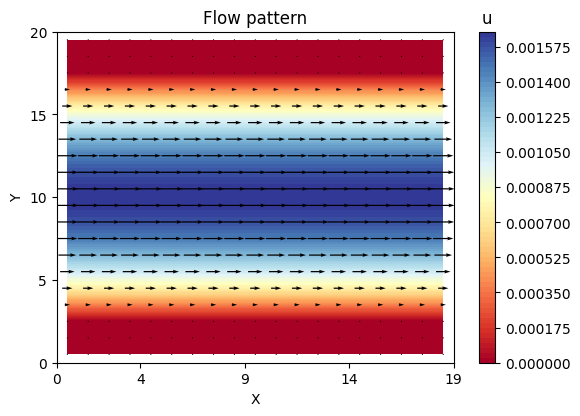

In [67]:
import matplotlib.pyplot as plt

# PARAMETERS #

# READ-IN PARAMETER FILE
dataFile = np.load('Data.npz')

Nx = dataFile['Nx']
Ny = dataFile['Ny']

LID_SPEED = dataFile['LID_SPEED']
VISCOSITY = dataFile['VISCOSITY']
FRANK_CONSTANT = dataFile['FRANK_CONSTANT']
GAMMA = dataFile['GAMMA']
NEMATIC_DENSITY = dataFile['NEMATIC_DENSITY']
ZETA = dataFile['ZETA']

density = dataFile['density']
vel_x = dataFile['vel_x']
vel_y = dataFile['vel_y']


# OUTPUT A NOTE WITH DIMENSIONLESS NUMBERS
Re = (Nx - 1) * LID_SPEED / VISCOSITY
Er = (Nx - 1) * LID_SPEED / (FRANK_CONSTANT * GAMMA)
Ac = -ZETA * (Nx - 1) / (VISCOSITY * LID_SPEED)
nematic_correlation_length = np.sqrt(FRANK_CONSTANT / NEMATIC_DENSITY)
active_correlation_length = np.sqrt(FRANK_CONSTANT / -ZETA)
nematic_correlation_time = 1 / (NEMATIC_DENSITY * GAMMA)
saloni_Activity = (Nx - 1) * np.sqrt(-ZETA / FRANK_CONSTANT)


# MAKE ANALYSIS DIRECTORY #
if not os.path.exists('frames'):
       os.mkdir('frames')
if not os.path.exists('slices'):
       os.mkdir('slices')
if not os.path.exists('Analysis'):
       os.mkdir('Analysis')


# Projecting velocities, not averaging
# due to matplotlib array indexing, np.swapaxes method is used

speed = np.sqrt(np.square(vel_x) + np.square(vel_y))

x_ticks = np.linspace(0,Nx,5,endpoint=True,dtype=int)
y_ticks = np.linspace(0,Ny,5,endpoint=True,dtype=int)


for t in range(time_steps):

       v_x = np.swapaxes(vel_x[t,:,:],0,1)
       v_y = np.swapaxes(vel_y[t,:,:],0,1)
       v = np.swapaxes(speed[t,:,:],0,1)

       fig, ax = plt.subplots()
       # fig.suptitle(SUPTITLE)
       plt.subplots_adjust(top=0.8)
       ax.set(xlim=(0, Nx), ylim=(0, Ny),
              xticks=x_ticks, yticks=y_ticks,
              xlabel='X', ylabel='Y',
              title='Flow pattern')
       x, y = np.meshgrid((np.arange(Nx) + 0.5), (np.arange(Ny) + 0.5))
       im = ax.contourf(x, y, v, 80, cmap='RdYlBu')
       clb = plt.colorbar(im,ax=ax)
       clb.ax.set_title('u')
       ax.streamplot(x, y, v_x, v_y, density=1.5, color='black')

       # plt.show()
       plt.savefig('frames/flow_t%02d.png'%(t+1))
       plt.close()

       fig, ax = plt.subplots()
       # fig.suptitle(SUPTITLE)
       plt.subplots_adjust(top=0.8)
       ax.set(xlim=(0, Nx), ylim=(0, Ny),
              xticks=x_ticks, yticks=y_ticks,
              xlabel='X', ylabel='Y',
              title='Flow pattern')
       x, y = np.meshgrid((np.arange(Nx) + 0.5), (np.arange(Ny) + 0.5))
       im = ax.contourf(x, y, v, 80, cmap='RdYlBu')
       clb = plt.colorbar(im,ax=ax)
       clb.ax.set_title('u')
       ax.quiver(x, y, v_x, v_y,
                     pivot='mid', units='inches')
       if t == (time_steps - 1):
              plt.show()
       plt.savefig('frames/flowfield_t%02d.png'%(t+1))
       plt.close()





#### test run turns out okay

Remember don't modify the shape of data read-in

it's better to swap axes after read in data, in this case,
since Nx ≠ Ny, modify the shape would induce a shift in the 
plot, which was unnecessarily confusing.

### Next is to make the IBLBM cpp source code compatible with the python-bash interface

In [80]:
%cd ../../../IB-LBM/
%pwd

/Users/tweng/Desktop/IB-LBM


/Users/tweng/Desktop/.venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'/Users/tweng/Desktop/IB-LBM'

In [81]:
# Test Folder Entry
DIR = '2dpois_test'
SUBSET = 'set3'
if not os.path.exists(os.path.join(os.getcwd(), 'temp/', SUBSET)):
    os.mkdir(os.path.join(os.getcwd(), 'temp/', SUBSET))

Re = 100
N = 19

# System Geometry
Nx = N 
Ny = N + 1

# Simulation timescale
t_num = 2000
t_disk = 100
t_lbm = 1

# Controlled parameters
vel_top =  1e-4
vel_bot = 0.0
gravity = 1e-5

IBM_stencil = 2 # interpolation stencil; available values: 2, 4
wall_num_nodes = 5 # number of IBM nodes along each wall
wall_width = 11 # channel width
wall_stiffness = 1 # IBM spring constant
# print(vel_back)
# Gamma = 100
# L = 3e-6
# U = 0.7
# A = 1e-3 / np.square(N/60)
# zeta = (0.073)/ np.square(N/60)
# xi = 1

Parameters = str(Nx)+' '+str(Ny)+' '+str(t_num)+' '+str(t_disk)+' '+str(t_lbm)+' '+str(vel_top)+' '+str(vel_bot)+' '+str(gravity)+' '+str(IBM_stencil)+' '+str(wall_num_nodes)+' '+str(wall_width)+' '+str(wall_stiffness)

FileName = "SimulationParameters.txt"
FileID = os.path.join(os.getcwd(), 'temp/', SUBSET, FileName)
    
with open(FileID, "w") as f:
    f.write("Nx Ny TOTAL_TIME DISK_TIME LBM_TIME TOP_SPEED BOT_SPEED GRAVITY IBM_STENCIL WALL_NUM_NODES WALL_WIDTH WALL_STIFFNESS\n")
    f.write(Parameters)

Process = subprocess.Popen(
    [       
        'bash',
        'bash/2d_pois.sh',
        DIR,
        SUBSET,
    ],
)

Process.wait()

Starting simulation:
  Writing data at 100
  Writing data at 200
  Writing data at 300
  Writing data at 400
  Writing data at 500
  Writing data at 600
  Writing data at 700
  Writing data at 800
  Writing data at 900
  Writing data at 1000
  Writing data at 1100
  Writing data at 1200
  Writing data at 1300
  Writing data at 1400
  Writing data at 1500
  Writing data at 1600
  Writing data at 1700
  Writing data at 1800
  Writing data at 1900
  Writing data at 2000
Simulation complete.


0

#### A segmentation fault happens when implementing the interface, the original code is risky in the debugger sense.

Turns out the IB function `spread()` and `interpolate()` includes a bug that makes `x_int` and/or `y_int` insanely large, both positive and negative cases appears (`x_int` being positive and `y_int` being negative, at the order of 2147483629).

Due to the above mentioned bug, when calculating immersed boundary forces to assign to the Eulerian nodes, the assignment exceeds the array size

It is caused by a stability issue due to velocity too large.

#### Bug fixed, stability issue, now let's add active liquid crystal to the system

In [82]:
%cd ../Data/2dpois_test/set3/
%pwd

/Users/tweng/Desktop/Data/2dpois_test/set3


/Users/tweng/Desktop/.venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'/Users/tweng/Desktop/Data/2dpois_test/set3'

In [83]:
import pandas as pd
import numpy as np
from glob import glob
import os

Parameters = './SimulationParameters.txt'
pf = pd.read_csv(Parameters, delimiter='\s', header=0, engine='python')
Nx = int(pf['Nx'].to_numpy()[0])
Ny = int(pf['Ny'].to_numpy()[0])
LID_SPEED = pf['TOP_SPEED'].to_numpy()[0]

t_lbm = pf['LBM_TIME'].to_numpy()[0]
VISCOSITY = (t_lbm - 0.5) / 3

# GAMMA = pf['GAMMA'].to_numpy()[0]
# ZETA = pf['ZETA'].to_numpy()[0]
# NEMATIC_DENSITY = pf['NEMATIC_DENSITY'].to_numpy()[0]
# NEMATIC_STRENGTH = pf['NEMATIC_STRENGTH'].to_numpy()[0]
# FRANK_CONSTANT = pf['FRANK_CONSTANT'].to_numpy()[0]

TOTAL_TIME = pf['TOTAL_TIME'].to_numpy()[0]
DISK_TIME = pf['DISK_TIME'].to_numpy()[0]

TOTAL_TIME = DISK_TIME * len(glob(os.getcwd()+'/data/*.dat'))
time_steps = int(TOTAL_TIME / DISK_TIME)

shape = (Nx, Ny)
temporal_shape = (time_steps, Nx, Ny)

density = np.zeros(temporal_shape)
vel_x = np.zeros(temporal_shape)
vel_y = np.zeros(temporal_shape)

density_Temp = np.zeros(shape)
vel_x_Temp = np.zeros(shape)
vel_y_Temp = np.zeros(shape)

for t in range(time_steps):
    data_file = 'data/fluid_t%d.dat' %((t+1) * DISK_TIME)
    df = pd.read_csv(data_file, delimiter='\s', header=0, engine='python') 

    # read in with delimiter of one-space separation
    # convert input into numpy array
    density_Temp = np.reshape(df['density'].to_numpy(), shape)
    vel_x_Temp = np.reshape(df['vel_x'].to_numpy(), shape)
    vel_y_Temp = np.reshape(df['vel_y'].to_numpy(), shape)

    density[t] = density_Temp
    vel_x[t] = vel_x_Temp
    vel_y[t] = vel_y_Temp


np.savez_compressed('Data.npz', 
                    Nx=Nx, Ny=Ny, Nz=Nz, 
                    VISCOSITY=VISCOSITY, GAMMA=GAMMA, 
                    LID_SPEED=LID_SPEED, ZETA=ZETA,
                    FRANK_CONSTANT=FRANK_CONSTANT, 
                    NEMATIC_DENSITY=NEMATIC_DENSITY,
                    
                    density=density,
                    vel_x=vel_x, vel_y=vel_y, 
                    )

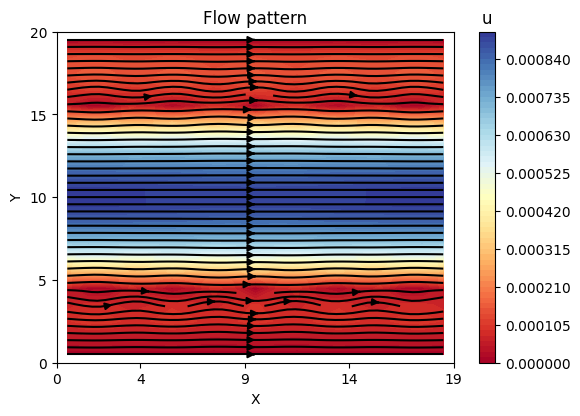

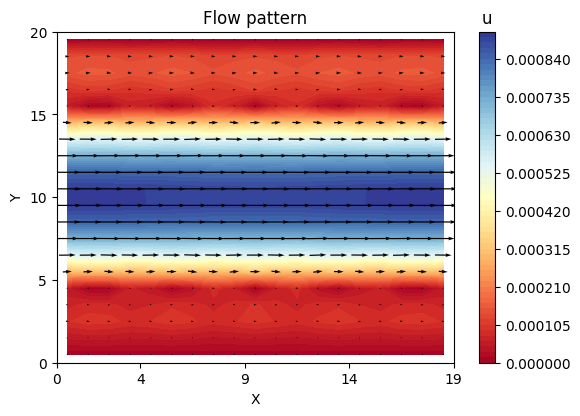

In [85]:
import matplotlib.pyplot as plt

# PARAMETERS #

# READ-IN PARAMETER FILE
dataFile = np.load('Data.npz')

Nx = dataFile['Nx']
Ny = dataFile['Ny']

# LID_SPEED = dataFile['LID_SPEED']
# VISCOSITY = dataFile['VISCOSITY']
# FRANK_CONSTANT = dataFile['FRANK_CONSTANT']
# GAMMA = dataFile['GAMMA']
# NEMATIC_DENSITY = dataFile['NEMATIC_DENSITY']
# ZETA = dataFile['ZETA']

density = dataFile['density']
vel_x = dataFile['vel_x']
vel_y = dataFile['vel_y']


# # OUTPUT A NOTE WITH DIMENSIONLESS NUMBERS
# Re = (Nx - 1) * LID_SPEED / VISCOSITY
# Er = (Nx - 1) * LID_SPEED / (FRANK_CONSTANT * GAMMA)
# Ac = -ZETA * (Nx - 1) / (VISCOSITY * LID_SPEED)
# nematic_correlation_length = np.sqrt(FRANK_CONSTANT / NEMATIC_DENSITY)
# active_correlation_length = np.sqrt(FRANK_CONSTANT / -ZETA)
# nematic_correlation_time = 1 / (NEMATIC_DENSITY * GAMMA)
# saloni_Activity = (Nx - 1) * np.sqrt(-ZETA / FRANK_CONSTANT)


# MAKE ANALYSIS DIRECTORY #
if not os.path.exists('frames'):
       os.mkdir('frames')
if not os.path.exists('slices'):
       os.mkdir('slices')
if not os.path.exists('Analysis'):
       os.mkdir('Analysis')


# Projecting velocities, not averaging
# due to matplotlib array indexing, np.swapaxes method is used

speed = np.sqrt(np.square(vel_x) + np.square(vel_y))

x_ticks = np.linspace(0,Nx,5,endpoint=True,dtype=int)
y_ticks = np.linspace(0,Ny,5,endpoint=True,dtype=int)


for t in range(time_steps):

       v_x = np.swapaxes(vel_x[t,:,:],0,1)
       v_y = np.swapaxes(vel_y[t,:,:],0,1)
       v = np.swapaxes(speed[t,:,:],0,1)

       fig, ax = plt.subplots()
       # fig.suptitle(SUPTITLE)
       plt.subplots_adjust(top=0.8)
       ax.set(xlim=(0, Nx), ylim=(0, Ny),
              xticks=x_ticks, yticks=y_ticks,
              xlabel='X', ylabel='Y',
              title='Flow pattern')
       x, y = np.meshgrid((np.arange(Nx) + 0.5), (np.arange(Ny) + 0.5))
       im = ax.contourf(x, y, v, 80, cmap='RdYlBu')
       clb = plt.colorbar(im,ax=ax)
       clb.ax.set_title('u')
       ax.streamplot(x, y, v_x, v_y, density=1.5, color='black')

       if t == (time_steps - 1):
              plt.show()
       plt.savefig('frames/flow_t%02d.png'%(t+1))
       plt.close()

       fig, ax = plt.subplots()
       # fig.suptitle(SUPTITLE)
       plt.subplots_adjust(top=0.8)
       ax.set(xlim=(0, Nx), ylim=(0, Ny),
              xticks=x_ticks, yticks=y_ticks,
              xlabel='X', ylabel='Y',
              title='Flow pattern')
       x, y = np.meshgrid((np.arange(Nx) + 0.5), (np.arange(Ny) + 0.5))
       im = ax.contourf(x, y, v, 80, cmap='RdYlBu')
       clb = plt.colorbar(im,ax=ax)
       clb.ax.set_title('u')
       ax.quiver(x, y, v_x, v_y,
                     pivot='mid', units='inches')
       
       if t == (time_steps - 1):
              plt.show()
       plt.savefig('frames/flowfield_t%02d.png'%(t+1))
       plt.close()





### Now adding the activity

In [86]:
%cd ../../../IB-LBM/
%pwd

/Users/tweng/Desktop/IB-LBM


/Users/tweng/Desktop/.venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'/Users/tweng/Desktop/IB-LBM'

In [ ]:
# Test Folder Entry
DIR = '2dpois_test'
SUBSET = 'set4'
if not os.path.exists(os.path.join(os.getcwd(), 'temp/', SUBSET)):
    os.mkdir(os.path.join(os.getcwd(), 'temp/', SUBSET))

Re = 100
N = 19

# System Geometry
Nx = N 
Ny = N + 1

# Simulation timescale
t_num = 2000
t_disk = 100
t_lbm = 1

# Controlled parameters
vel_top =  1e-4
vel_bot = 0.0
gravity = 1e-5

IBM_stencil = 2 # interpolation stencil; available values: 2, 4
wall_num_nodes = 5 # number of IBM nodes along each wall
wall_width = 11 # channel width
wall_stiffness = 1 # IBM spring constant

Gamma = 100
L = 3e-6
U = 0.7
A = 1e-3 / N**2
zeta = (0.073)/ N**2
xi = 1

Parameters = str(Nx)+' '+str(Ny)+' '+str(t_num)+' '+str(t_disk)+' '+str(t_lbm)+' '+str(vel_top)+' '+str(vel_bot)+' '+str(gravity)+' '+str(IBM_stencil)+' '+str(wall_num_nodes)+' '+str(wall_width)+' '+str(wall_stiffness)

FileName = "SimulationParameters.txt"
FileID = os.path.join(os.getcwd(), 'temp/', SUBSET, FileName)
    
with open(FileID, "w") as f:
    f.write("Nx Ny TOTAL_TIME DISK_TIME LBM_TIME TOP_SPEED BOT_SPEED GRAVITY IBM_STENCIL WALL_NUM_NODES WALL_WIDTH WALL_STIFFNESS\n")
    f.write(Parameters)

Process = subprocess.Popen(
    [       
        'bash',
        'bash/2d_pois.sh',
        DIR,
        SUBSET,
    ],
)

Process.wait()